In [1]:
# https://pypi.org/project/graphviz/

In [2]:
# !pip install graphviz

In [3]:
from collections import defaultdict
from graphviz import Digraph

In [4]:
# KEY=route, VAL=list of stops
routes = {
    "A": [1, 5, 7, 9, 12, 19],
    "B": [25, 12, 11, 7, 2]
}

stop_counts = defaultdict(int)
important = set() # end points and transfer points

for stops in routes.values():
    # end points
    important.add(stops[0])
    important.add(stops[-1])
    for stop in stops:
        stop_counts[stop] += 1

# transfer points appear twice
for stop in stop_counts:
    if stop_counts[stop] > 1:
        important.add(stop)

# filter original routes to only include important points
for k in routes:
    routes[k] = [stop for stop in routes[k] if stop in important]
routes

{'A': [1, 7, 12, 19], 'B': [25, 12, 7, 2]}

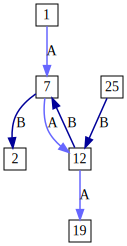

In [5]:
g = Digraph()

# draw nodes
g.attr('node', width="0", height="0", margin="0.05", shape="square")
for stop in important:
    g.node(str(stop))

# draw edges
colors = ["#6666FF", "#000099"]
for route, stops in routes.items():
    g.attr('edge', color=colors.pop(0), penwidth="1.5")
    for i in range(len(stops) - 1):
        g.edge(str(stops[i]), str(stops[i+1]), str(route))

g